In [19]:
import pandas as pd
import yfinance as yf
df = yf.download("MANALIPETC.NS",period="4y")
df.reset_index(inplace=True)

df['Date'] = df['Date'].dt.strftime('%Y/%m/%d')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-11-22,34.099998,34.349998,33.549999,33.650002,29.078279,154823
2018-11-26,34.000000,34.049999,32.650002,32.750000,28.300556,274193
2018-11-27,32.750000,32.950001,32.000000,32.250000,27.868484,170457
2018-11-28,32.450001,33.049999,32.099998,32.250000,27.868484,237046
2018-11-29,32.349998,32.650002,31.750000,31.850000,27.522831,259870


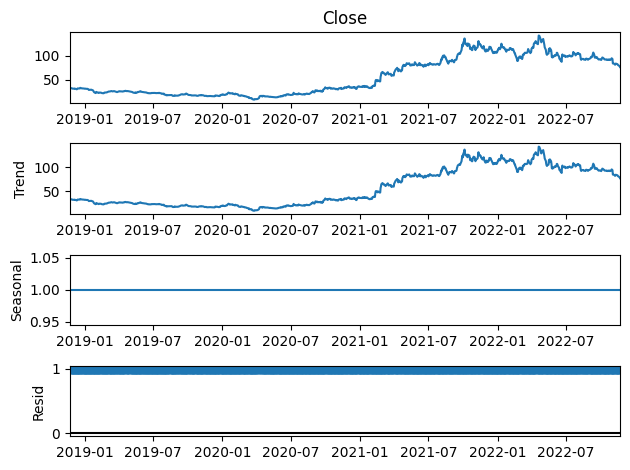

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['Close'], model='multiplicative',extrapolate_trend='freq', period=1)  # model='mul' also works
result.plot();

In [22]:
len(df)

988

/Users/sjacob/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sjacob/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/Users/sjacob/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


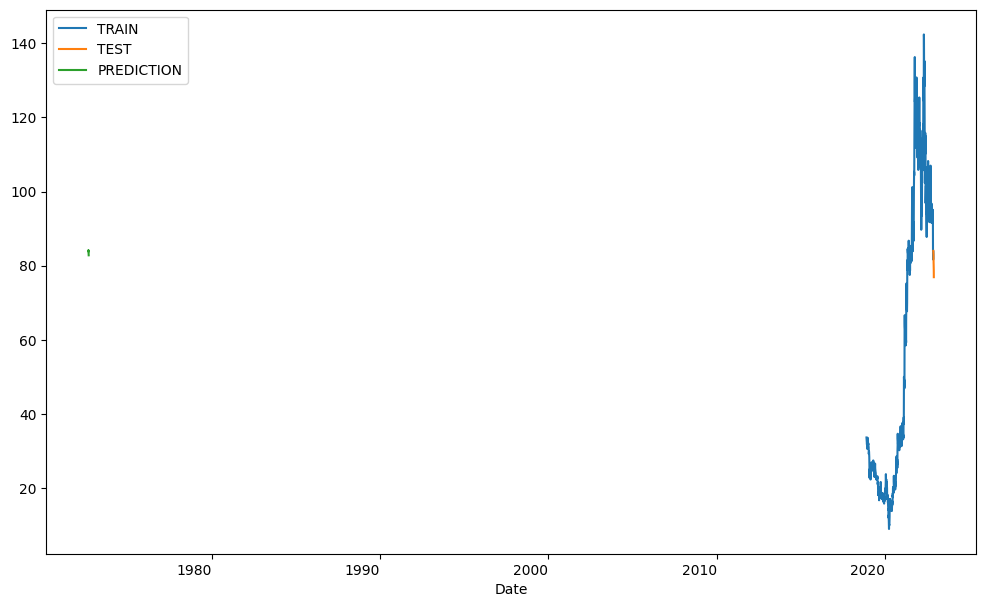

In [42]:
train_data = df.iloc[:980]# Goes up to but not including 108
test_data = df.iloc[980:]
from statsmodels.tsa.holtwinters import ExponentialSmoothing

fitted_model = ExponentialSmoothing(train_data['Close'],trend='mul',seasonal='mul',seasonal_periods=12).fit()
test_predictions = fitted_model.forecast(8).rename('HW Forecast')
test_predictions
train_data['Close'].plot(legend=True,label='TRAIN')
test_data['Close'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION');

In [43]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mean_absolute_error(test_data['Close'],test_predictions)

2.5531355888021015

In [44]:
mean_squared_error(test_data['Close'],test_predictions)

9.972357897455655

In [45]:
import numpy as np
np.sqrt(mean_squared_error(test_data['Close'],test_predictions))

3.1579040355045076

In [46]:
test_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,81.968749,82.474998,80.550000,81.087501,81.087501,343728.750000
std,2.365517,2.222611,2.381475,2.430572,2.430572,131479.586128
min,77.199997,78.349998,76.300003,76.900002,76.900002,182077.000000
25%,80.824999,81.174999,79.500000,79.950001,79.950001,237688.500000
50%,82.500000,82.875000,81.000000,81.325001,81.325001,348571.500000
75%,83.625000,84.074997,82.599998,83.062502,83.062502,398190.000000
max,84.449997,85.099998,82.900002,84.000000,84.000000,594510.000000


In [47]:
test_predictions

980    84.025879
981    84.191846
982    83.870385
983    83.786210
984    84.051700
985    83.307745
986    83.085290
987    82.806034
Name: HW Forecast, dtype: float64

/Users/sjacob/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sjacob/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/Users/sjacob/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


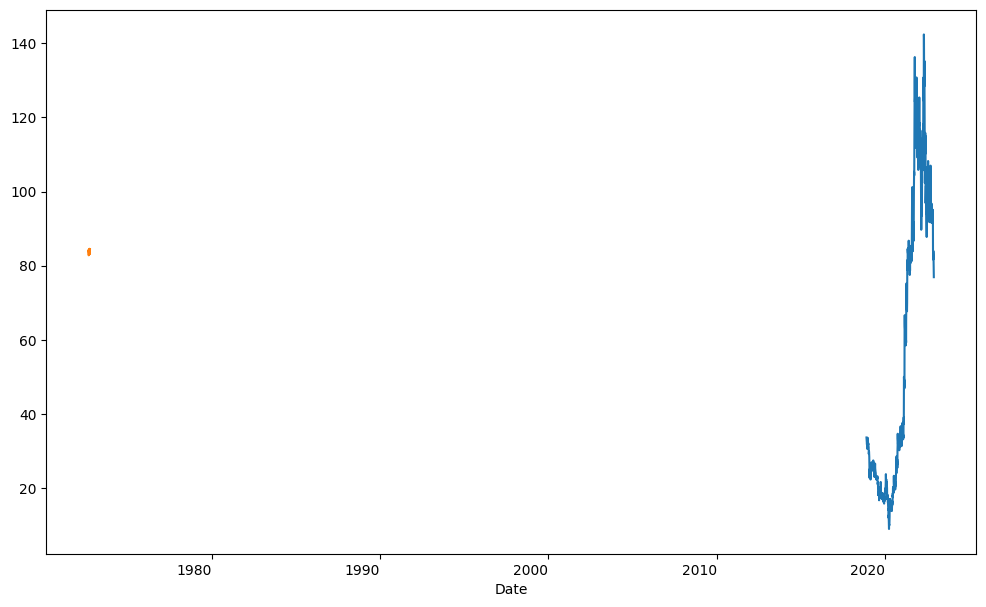

In [48]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
final_model = ExponentialSmoothing(df['Close'],trend='mul',seasonal='mul',seasonal_periods=12).fit()
forecast_predictions = fitted_model.forecast(36).rename('HW Forecast')
df['Close'].plot(figsize=(12,8))
forecast_predictions.plot();

In [49]:
forecast_predictions

980     84.025879
981     84.191846
982     83.870385
983     83.786210
984     84.051700
985     83.307745
986     83.085290
987     82.806034
988     83.015782
989     83.522699
990     83.715216
991     84.035691
992     84.211961
993     84.378296
994     84.056122
995     83.971761
996     84.237839
997     83.492237
998     83.269289
999     82.989414
1000    83.199627
1001    83.707666
1002    83.900610
1003    84.221794
1004    84.398455
1005    84.565158
1006    84.242271
1007    84.157723
1008    84.424390
1009    83.677137
1010    83.453695
1011    83.173201
1012    83.383879
1013    83.893044
1014    84.086415
1015    84.408310
Name: HW Forecast, dtype: float64